In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [37]:
train_dir = "cifake/train"
val_dir   = "cifake/validation"
test_dir  = "cifake/test"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    "cifake/train",
    target_size=(32, 32),
    batch_size=32,            
    class_mode='binary'
)

val_gen = val_test_datagen.flow_from_directory(
    "cifake/validation",
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary'
)

test_gen = val_test_datagen.flow_from_directory(
    "cifake/test",
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 80000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [39]:
from tensorflow.keras import layers, models, regularizers

model = models.Sequential([

    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


In [40]:
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.0005, weight_decay=1e-4)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 847,777 (3.23 MB)

 Trainable params: 846,305 (3.23 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ModelCheckpoint('best_bonus_model_v3.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=60,
    batch_size=32,
    callbacks=callbacks
)


Epoch 1/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7075 - loss: 0.9372
Epoch 1: val_accuracy improved from -inf to 0.88210, saving model to best_bonus_model_v3.h5


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 118s 42ms/step - accuracy: 0.7075 - loss: 0.9371 - val_accuracy: 0.8821 - val_loss: 0.4047 - learning_rate: 5.0000e-04
Epoch 2/60
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8396 - loss: 0.4523
Epoch 2: val_accuracy improved from 0.88210 to 0.88540, saving model to best_bonus_model_v3.h5


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 104s 42ms/step - accuracy: 0.8396 - loss: 0.4523 - val_accuracy: 0.8854 - val_loss: 0.3111 - learning_rate: 5.0000e-04
Epoch 3/60
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8544 - loss: 0.3598
Epoch 3: val_accuracy did not improve from 0.88540
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 105s 42ms/step - accuracy: 0.8544 - loss: 0.3598 - val_accuracy: 0.8692 - val_loss: 0.3529 - learning_rate: 5.0000e-04
Epoch 4/60
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8659 - loss: 0.3328
Epoch 4: val_accuracy improved from 0.88540 to 0.92160, saving model to best_bonus_model_v3.h5


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 104s 41ms/step - accuracy: 0.8659 - loss: 0.3328 - val_accuracy: 0.9216 - val_loss: 0.2158 - learning_rate: 5.0000e-04
Epoch 5/60
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8731 - loss: 0.3140
Epoch 5: val_accuracy improved from 0.92160 to 0.92495, saving model to best_bonus_model_v3.h5


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 103s 41ms/step - accuracy: 0.8731 - loss: 0.3140 - val_accuracy: 0.9250 - val_loss: 0.2135 - learning_rate: 5.0000e-04
Epoch 6/60
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8775 - loss: 0.3085
Epoch 6: val_accuracy did not improve from 0.92495
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 106s 42ms/step - accuracy: 0.8775 - loss: 0.3085 - val_accuracy: 0.9237 - val_loss: 0.2193 - learning_rate: 5.0000e-04
Epoch 7/60
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8834 - loss: 0.2955
Epoch 7: val_accuracy did not improve from 0.92495
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 110s 44ms/step - accuracy: 0.8834 - loss: 0.2955 - val_accuracy: 0.9170 - val_loss: 0.2185 - learning_rate: 5.0000e-04
Epoch 8/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8885 - loss: 0.2880
Epoch 8: val_accuracy improved from 0.92495 to 0.93190, saving model to best_bonus_model_v3.h5


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 109s 43ms/step - accuracy: 0.8885 - loss: 0.2880 - val_accuracy: 0.9319 - val_loss: 0.1855 - learning_rate: 5.0000e-04
Epoch 9/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8855 - loss: 0.2878
Epoch 9: val_accuracy did not improve from 0.93190
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 105s 42ms/step - accuracy: 0.8855 - loss: 0.2878 - val_accuracy: 0.8924 - val_loss: 0.2799 - learning_rate: 5.0000e-04
Epoch 10/60
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8887 - loss: 0.2823
Epoch 10: val_accuracy did not improve from 0.93190
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 103s 41ms/step - accuracy: 0.8887 - loss: 0.2823 - val_accuracy: 0.9211 - val_loss: 0.2135 - learning_rate: 5.0000e-04
Epoch 11/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8942 - loss: 0.2725
Epoch 11: val_accuracy improved from 0.93190 to 0.94055, saving model to best_bonus_model_v3.h5


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 106s 42ms/step - accuracy: 0.8942 - loss: 0.2725 - val_accuracy: 0.9406 - val_loss: 0.1701 - learning_rate: 5.0000e-04
Epoch 12/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8955 - loss: 0.2707
Epoch 12: val_accuracy did not improve from 0.94055
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 109s 44ms/step - accuracy: 0.8955 - loss: 0.2707 - val_accuracy: 0.9307 - val_loss: 0.1932 - learning_rate: 5.0000e-04
Epoch 13/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8997 - loss: 0.2627
Epoch 13: val_accuracy did not improve from 0.94055
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 107s 43ms/step - accuracy: 0.8997 - loss: 0.2627 - val_accuracy: 0.9184 - val_loss: 0.2071 - learning_rate: 5.0000e-04
Epoch 14/60
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8999 - loss: 0.2600
Epoch 14: val_accuracy did not improve from 0.94055
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 105s 42ms/step - accuracy: 0.8999 - loss: 0.2600 - val_accuracy: 0.9406 - val_loss: 0.1658 - 

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 107s 43ms/step - accuracy: 0.9096 - loss: 0.2403 - val_accuracy: 0.9449 - val_loss: 0.1566 - learning_rate: 5.0000e-04
Epoch 19/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9097 - loss: 0.2389
Epoch 19: val_accuracy did not improve from 0.94485
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 111s 44ms/step - accuracy: 0.9097 - loss: 0.2389 - val_accuracy: 0.9038 - val_loss: 0.2338 - learning_rate: 5.0000e-04
Epoch 20/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9109 - loss: 0.2384
Epoch 20: val_accuracy improved from 0.94485 to 0.94630, saving model to best_bonus_model_v3.h5


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 107s 43ms/step - accuracy: 0.9109 - loss: 0.2384 - val_accuracy: 0.9463 - val_loss: 0.1561 - learning_rate: 5.0000e-04
Epoch 21/60
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9078 - loss: 0.2388
Epoch 21: val_accuracy did not improve from 0.94630
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 106s 43ms/step - accuracy: 0.9078 - loss: 0.2388 - val_accuracy: 0.9427 - val_loss: 0.1605 - learning_rate: 5.0000e-04
Epoch 22/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9139 - loss: 0.2321
Epoch 22: val_accuracy did not improve from 0.94630
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 141s 42ms/step - accuracy: 0.9139 - loss: 0.2321 - val_accuracy: 0.9378 - val_loss: 0.1691 - learning_rate: 5.0000e-04
Epoch 23/60
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9132 - loss: 0.2351
Epoch 23: val_accuracy did not improve from 0.94630
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 106s 42ms/step - accuracy: 0.9132 - loss: 0.2351 - val_accuracy: 0.9459 - val_loss: 0.1546 - 

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 106s 42ms/step - accuracy: 0.9146 - loss: 0.2287 - val_accuracy: 0.9515 - val_loss: 0.1404 - learning_rate: 5.0000e-04
Epoch 27/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9161 - loss: 0.2244
Epoch 27: val_accuracy did not improve from 0.95150
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 109s 44ms/step - accuracy: 0.9161 - loss: 0.2244 - val_accuracy: 0.9377 - val_loss: 0.1708 - learning_rate: 5.0000e-04
Epoch 28/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9174 - loss: 0.2250
Epoch 28: val_accuracy did not improve from 0.95150
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 108s 43ms/step - accuracy: 0.9174 - loss: 0.2250 - val_accuracy: 0.9471 - val_loss: 0.1603 - learning_rate: 5.0000e-04
Epoch 29/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9207 - loss: 0.2166
Epoch 29: val_accuracy did not improve from 0.95150
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 106s 43ms/step - accuracy: 0.9207 - loss: 0.2166 - val_accuracy: 0.9264 - val_loss: 0.2084 - 

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 106s 43ms/step - accuracy: 0.9225 - loss: 0.2063 - val_accuracy: 0.9536 - val_loss: 0.1315 - learning_rate: 2.5000e-04
Epoch 32/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9257 - loss: 0.1975
Epoch 32: val_accuracy did not improve from 0.95365
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 107s 43ms/step - accuracy: 0.9257 - loss: 0.1975 - val_accuracy: 0.9504 - val_loss: 0.1337 - learning_rate: 2.5000e-04
Epoch 33/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9292 - loss: 0.1926
Epoch 33: val_accuracy did not improve from 0.95365
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 105s 42ms/step - accuracy: 0.9292 - loss: 0.1926 - val_accuracy: 0.9478 - val_loss: 0.1407 - learning_rate: 2.5000e-04
Epoch 34/60
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9275 - loss: 0.1923
Epoch 34: val_accuracy improved from 0.95365 to 0.95590, saving model to best_bonus_model_v3.h5


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 108s 43ms/step - accuracy: 0.9275 - loss: 0.1923 - val_accuracy: 0.9559 - val_loss: 0.1249 - learning_rate: 2.5000e-04
Epoch 35/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9304 - loss: 0.1860
Epoch 35: val_accuracy did not improve from 0.95590
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 108s 43ms/step - accuracy: 0.9304 - loss: 0.1860 - val_accuracy: 0.9531 - val_loss: 0.1333 - learning_rate: 2.5000e-04
Epoch 36/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9276 - loss: 0.1932
Epoch 36: val_accuracy did not improve from 0.95590
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 111s 44ms/step - accuracy: 0.9276 - loss: 0.1932 - val_accuracy: 0.9409 - val_loss: 0.1525 - learning_rate: 2.5000e-04
Epoch 37/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9306 - loss: 0.1846
Epoch 37: val_accuracy did not improve from 0.95590
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 109s 44ms/step - accuracy: 0.9306 - loss: 0.1846 - val_accuracy: 0.9550 - val_loss: 0.1235 - 

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 108s 43ms/step - accuracy: 0.9347 - loss: 0.1714 - val_accuracy: 0.9577 - val_loss: 0.1152 - learning_rate: 1.2500e-04
Epoch 44/60
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9380 - loss: 0.1682
Epoch 44: val_accuracy did not improve from 0.95770
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 108s 43ms/step - accuracy: 0.9380 - loss: 0.1682 - val_accuracy: 0.9542 - val_loss: 0.1214 - learning_rate: 1.2500e-04
Epoch 45/60
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9362 - loss: 0.1702
Epoch 45: val_accuracy did not improve from 0.95770
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 107s 43ms/step - accuracy: 0.9362 - loss: 0.1702 - val_accuracy: 0.9566 - val_loss: 0.1188 - learning_rate: 1.2500e-04
Epoch 46/60
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9344 - loss: 0.1719
Epoch 46: val_accuracy improved from 0.95770 to 0.95980, saving model to best_bonus_model_v3.h5


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 107s 43ms/step - accuracy: 0.9344 - loss: 0.1719 - val_accuracy: 0.9598 - val_loss: 0.1112 - learning_rate: 1.2500e-04
Epoch 47/60
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9368 - loss: 0.1682
Epoch 47: val_accuracy did not improve from 0.95980
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 106s 43ms/step - accuracy: 0.9368 - loss: 0.1683 - val_accuracy: 0.9578 - val_loss: 0.1149 - learning_rate: 1.2500e-04
Epoch 48/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9376 - loss: 0.1643
Epoch 48: val_accuracy did not improve from 0.95980
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 108s 43ms/step - accuracy: 0.9376 - loss: 0.1643 - val_accuracy: 0.9564 - val_loss: 0.1192 - learning_rate: 1.2500e-04
Epoch 49/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9359 - loss: 0.1702
Epoch 49: val_accuracy did not improve from 0.95980
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 107s 43ms/step - accuracy: 0.9359 - loss: 0.1702 - val_accuracy: 0.9504 - val_loss: 0.1291 - 

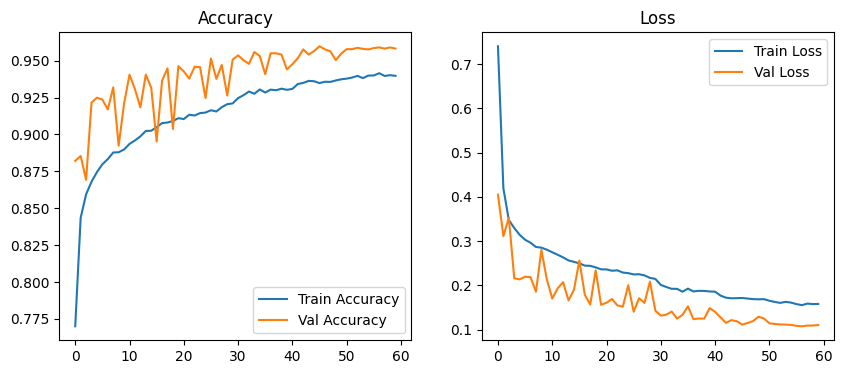

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [35]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc * 100:.2f}%")

625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9566 - loss: 0.1137

 Test Accuracy: 96.02%
